In [19]:
URL = 'https://www.amazon.com/PlayStation-5-Console/product-reviews/B08FC5L3RG/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

def LoadPackages():
    # Load Core Packages:
    global pd, time, plt, np
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    import time

    # Load Selenium Packages:
    global webdriver, By, WebDriverWait, Select, EC, TimeoutException, Keys
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait, Select
    from selenium.webdriver.support import expected_conditions as EC
    from selenium.common.exceptions import TimeoutException
    from selenium.webdriver.common.keys import Keys

    # Load Natural Language Processing Packages:
    global re, word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer, WordCloud, stopwords, Counter
    import re
    from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer
    from wordcloud import WordCloud
    from nltk.corpus import stopwords
    from collections import Counter


def AssignSession():
    global command_url, session_id
    command_url = f'driver.command_executor._url: {driver.command_executor._url}'.split( )[1]
    session_id = f'driver.session_id: {driver.session_id}'

def WebDriver():
    global driver
    driver = webdriver.Chrome(r'C:\Users\Ahicks88\Documents\Briefcase\Analytics\GitHub\Tools-References\Tools\chromedriver')

def WebDriverContinue():
    global driver2
    driver2 = webdriver.Remote(command_executor=command_url)  
    if driver2.session_id != session_id:
        driver2.close()
        driver2.quit()   
    driver2.session_id = session_id

In [3]:
LoadPackages()
WebDriver()
driver.get(URL)
AssignSession()

In [5]:
# WebDriverContinue()

# # This variable extracts the element to idenify the number of stars associated with the review
# class_str = driver.find_element_by_xpath('/html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{}]/div/div/div[2]/a[1]/i'.format(9)).get_attribute('class')

# # This variable removes all non-numeric keys out of the string
# stars = re.findall('[0-9]+', class_str)

# # This variable classifies the rating in a usable format
# Review_Rating = "{} stars".format(int(' '.join([str(elem) for elem in stars])))
# Review_Rating



In [6]:
WebDriverContinue()

reviews = []
ratings = []

# Skipped first 10 reviews because the format of the HTML alternates from [1] to [2] once you get to the second page for the review format variable.
driver.find_element_by_xpath('//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a').click()
time.sleep(1)  

# Loops through all pages available for reviews of product
while True:
    j = 1
    # Loops through all 10 reviews available per page and stores it into the reviews list
    for j in range (2,12):
        try:
            # This variable extracts the review content from the page
            review = driver.find_element_by_xpath('/html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{}]/div/div/div[4]/span/span'.format(j)).text
            reviews.append(review)

            # This variable extracts the element to idenify the number of stars associated with the review
            class_str = driver.find_element_by_xpath('/html/body/div[1]/div[3]/div/div[1]/div/div[1]/div[5]/div[3]/div/div[{}]/div/div/div[2]/a[1]/i'.format(j)).get_attribute('class')
            # This variable removes all non-numeric keys out of the string
            stars = re.findall('[0-9]+', class_str)
            # This variable classifies the rating in a usable format
            Review_Rating = "{} stars".format(int(' '.join([str(elem) for elem in stars])))
            ratings.append(Review_Rating)

            j += 1
        except:
            pass
    try:    
        driver.find_element_by_xpath('//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a').click()
        time.sleep(0.5) 
    except:
        break
    
print('{} reviews were added to the dataset.'.format(len(reviews)))

# Combine results into a dataframe
dfReviews = pd.DataFrame(list(zip(ratings, reviews)))
dfReviews.columns = ['Rating', 'Review']

# Filter based of number of stars
star1 = dfReviews[dfReviews['Rating'] == '1 stars']
star2 = dfReviews[dfReviews['Rating'] == '2 stars']
star3 = dfReviews[dfReviews['Rating'] == '3 stars']
star4 = dfReviews[dfReviews['Rating'] == '4 stars']
star5 = dfReviews[dfReviews['Rating'] == '5 stars']

# dfReviews.head()

2047 reviews were added to the dataset.


,Rating,Review
0,1 stars,This is some bs 😒 🙄 😑 smh how a 500.00 game co...
1,1 stars,Heck no people should be ashamed this price is...
2,5 stars,Going over hardware and software. Not going ov...
3,1 stars,Total Scam!!!
4,1 stars,Would rather wait for more stock to come up th...


In [52]:
# Look at nth review in the dataset:
# reviews[0]

# Convert list into a single string
soup = "".join(reviews) 
soup_star1 = "".join(star1['Review']) 
soup_star2 = "".join(star2['Review'])
soup_star3 = "".join(star3['Review'])
soup_star4 = "".join(star4['Review'])
soup_star5 = "".join(star5['Review'])

# Look at head end of soup
# print(soup[:100])

# Look at tail end of soup
# print(soup[-100:])

In [53]:
# Transform data
tokenized_soup = [n.lower() for n in re.findall('\w+', soup)]

print('-' * 48)
print('Dataset Summary')
print('-' * 48)
summary_reviews = len(reviews);                     print('There are {} reviews in the dataset'.format(summary_reviews));
summary_sentences = len(sent_tokenize(soup));       print('There are {} sentences in the dataset'.format(summary_sentences));
summary_words = len(tokenized_soup);                print('There are {} words in the soup'.format(summary_words));
summary_distinctwords = len(set(tokenized_soup));   print('There are {} distinct words in the soup'.format(summary_distinctwords))
print('-' * 48)
summary_reviews = len(star1);                     print('There are {} reviews with 1 stars'.format(summary_reviews));
summary_reviews = len(star2);                     print('There are {} reviews with 2 stars'.format(summary_reviews));
summary_reviews = len(star3);                     print('There are {} reviews with 3 stars'.format(summary_reviews));
summary_reviews = len(star4);                     print('There are {} reviews with 4 stars'.format(summary_reviews));
summary_reviews = len(star5);                     print('There are {} reviews with 5 stars'.format(summary_reviews));
print('-' * 48)
KPI_Avg_sent_review = round(summary_sentences/summary_reviews,2);       print('There is an average of {} sentences per review'.format(KPI_Avg_sent_review));
KPI_Avge_word_review = round(summary_words/summary_reviews,2);          print('There is an average of {} words per review'.format(KPI_Avge_word_review));

------------------------------------------------
Dataset Summary
------------------------------------------------
There are 2047 reviews in the dataset
There are 5005 sentences in the dataset
There are 92293 words in the soup
There are 6409 distinct words in the soup
------------------------------------------------
There are 372 reviews with 1 stars
There are 26 reviews with 2 stars
There are 48 reviews with 3 stars
There are 112 reviews with 4 stars
There are 1489 reviews with 5 stars
------------------------------------------------
There is an average of 3.36 sentences per review
There is an average of 61.98 words per review


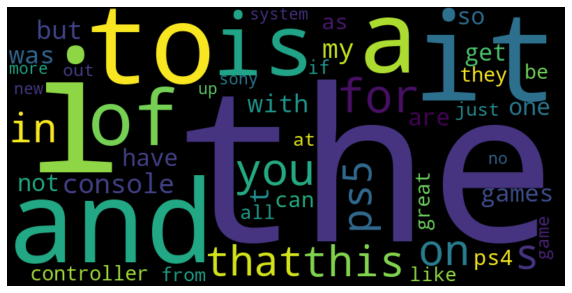

In [54]:
LoadPackages()
counter = Counter(tokenized_soup)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

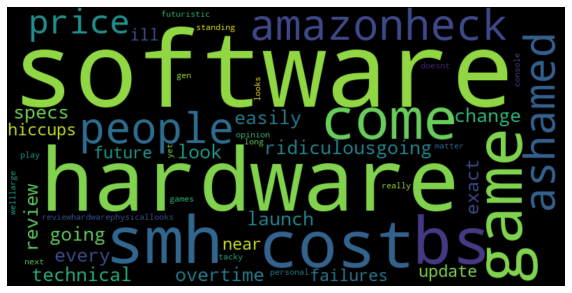

In [110]:
# Remove stopwords
LoadPackages()
stop_words = stopwords.words('english')

# Clean words
cleaned_words = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup))
tokenized_soup = [n.lower() for n in re.findall('\w+', cleaned_words)]
filtered_words = [word for word in tokenized_soup if word not in stop_words][0:50]

counter = Counter(filtered_words)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

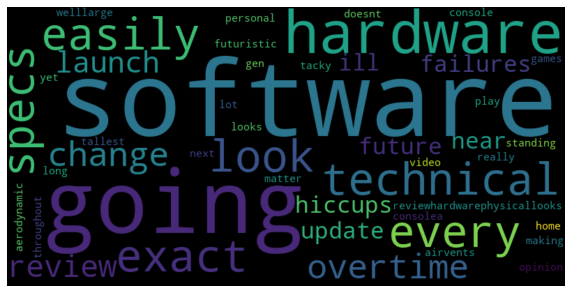

In [111]:
# 5 star wordcloud
LoadPackages()

cleaned_words_star5 = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup_star5))
tokenized_soup_star5 = [n.lower() for n in re.findall('\w+', cleaned_words_star5)]
filtered_words_star5 = [word for word in tokenized_soup_star5 if word not in stop_words][0:50]

counter = Counter(filtered_words_star5)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

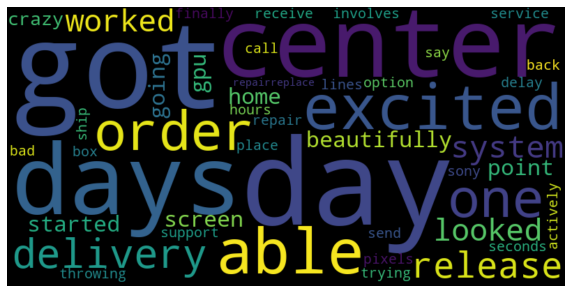

In [112]:
# 4 star wordcloud
LoadPackages()

cleaned_words_star4 = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup_star4))
tokenized_soup_star4 = [n.lower() for n in re.findall('\w+', cleaned_words_star4)]
filtered_words_star4 = [word for word in tokenized_soup_star4 if word not in stop_words][0:50]

counter = Counter(filtered_words_star4)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

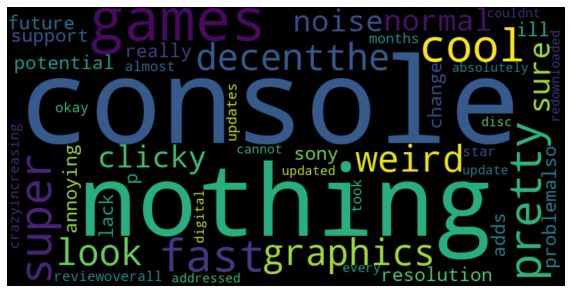

In [113]:
# 3 star wordcloud
LoadPackages()

cleaned_words_star3 = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup_star3))
tokenized_soup_star3 = [n.lower() for n in re.findall('\w+', cleaned_words_star3)]
filtered_words_star3 = [word for word in tokenized_soup_star3 if word not in stop_words][0:50]

counter = Counter(filtered_words_star3)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

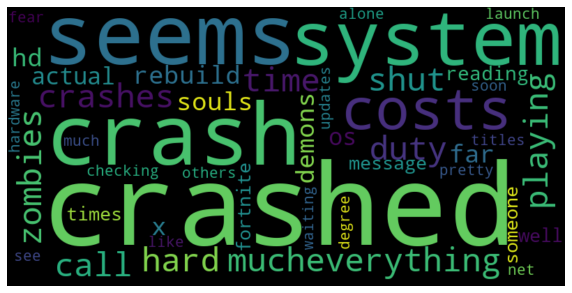

In [114]:
# 2 star wordcloud
LoadPackages()

cleaned_words_star2 = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup_star2))
tokenized_soup_star2 = [n.lower() for n in re.findall('\w+', cleaned_words_star2)]
filtered_words_star2 = [word for word in tokenized_soup_star2 if word not in stop_words][0:50]

counter = Counter(filtered_words_star2)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

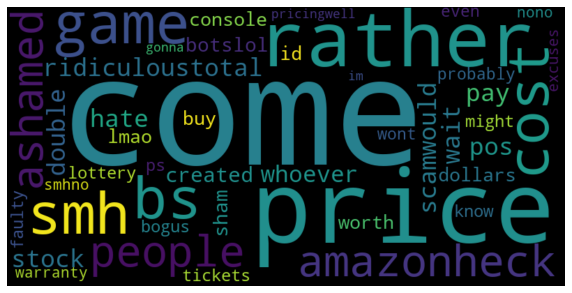

In [115]:
# 1 star wordcloud
LoadPackages()

cleaned_words_star1 = re.sub(r'[^a-zA-Z ]',r'',re.sub(r'[?|$|.|!]',r'',soup_star1))
tokenized_soup_star1 = [n.lower() for n in re.findall('\w+', cleaned_words_star1)]
filtered_words_star1 = [word for word in tokenized_soup_star1 if word not in stop_words][0:50]

counter = Counter(filtered_words_star1)
most_occur = counter.most_common(50)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(tuple(most_occur)))

# Plot
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()